In [ ]:
#Twitter Sentiment using Vader

In [ ]:
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 23.8 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.2-py2.py3-none-any.whl size=281824025 sha256=7bd4cb446f3bcde669263b0633078518126e8fd02a463760f4d6bb57f66fce05
  Stored in directory: /root/.cache/pip/wheels/b1/59/a0/a1a0624b5e865fd389919c1a10f53aec9b12195d6747710baf
Successfully built pyspark


In [ ]:
import pyspark as spark
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from pyspark.sql.types import *
from pyspark.sql import SQLContext
from pyspark.sql.functions import col,udf,monotonically_increasing_id,unix_timestamp,round,avg
import re
sc = spark.SparkContext()
sql = spark.SQLContext(sc)

In [ ]:
#Load the data
from google.colab import files
uploaded = files.upload()

Saving Tweet_btc.csv to Tweet_btc.csv


In [ ]:
#Store the data into DataFrames
df_Twbtc= pd.read_csv('Tweet_btc.csv')
#Print the first 5 rows of Bitcoin data
df_Twbtc.head()

,date_time,tweets,Cleaned_Tweets
0,2023-02-26 12:58:24,Even if they decide to ban crypto exchanges or...,Even if they decide to ban crypto exchanges or...
1,2023-02-26 12:58:22,Bitcoin is the gateway drug that opens your ey...,Bitcoin is the gateway drug that opens your ey...
2,2023-02-26 12:58:21,Slater &amp; Gordon receive takeover offer to ...,Slater &amp; Gordon receive takeover offer to ...
3,2023-02-26 12:58:11,1 Kg Pamp Suisse #Gold Bar (999.9 Fine Gold).\...,1 Kg Pamp Suisse Bar (999.9 Fine Gold).Priced...
4,2023-02-26 12:58:11,Erik ten Hag hails Man Utd's strength in depth...,Erik ten Hag hails Man Utd's strength in depth...


In [ ]:
pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 5.2 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
#estimate polarity
df_Twbtc['Polarity'] = df_Twbtc['Cleaned_Tweets'].apply(lambda review: sid.polarity_scores(review))

df_Twbtc.head()

,date_time,tweets,Cleaned_Tweets,Polarity
0,2023-02-26 12:58:24,Even if they decide to ban crypto exchanges or...,Even if they decide to ban crypto exchanges or...,"{'neg': 0.075, 'neu': 0.851, 'pos': 0.075, 'co..."
1,2023-02-26 12:58:22,Bitcoin is the gateway drug that opens your ey...,Bitcoin is the gateway drug that opens your ey...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,2023-02-26 12:58:21,Slater &amp; Gordon receive takeover offer to ...,Slater &amp; Gordon receive takeover offer to ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,2023-02-26 12:58:11,1 Kg Pamp Suisse #Gold Bar (999.9 Fine Gold).\...,1 Kg Pamp Suisse Bar (999.9 Fine Gold).Priced...,"{'neg': 0.077, 'neu': 0.764, 'pos': 0.159, 'co..."
4,2023-02-26 12:58:11,Erik ten Hag hails Man Utd's strength in depth...,Erik ten Hag hails Man Utd's strength in depth...,"{'neg': 0.0, 'neu': 0.711, 'pos': 0.289, 'comp..."


In [ ]:
#Now will call out compound as a separate column
df_Twbtc['compound']  = df_Twbtc['Polarity'].apply(lambda score_dict: score_dict['compound'])

df_Twbtc.head()

,date_time,tweets,Cleaned_Tweets,Polarity,compound
0,2023-02-26 12:58:24,Even if they decide to ban crypto exchanges or...,Even if they decide to ban crypto exchanges or...,"{'neg': 0.075, 'neu': 0.851, 'pos': 0.075, 'co...",-0.2500
1,2023-02-26 12:58:22,Bitcoin is the gateway drug that opens your ey...,Bitcoin is the gateway drug that opens your ey...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2,2023-02-26 12:58:21,Slater &amp; Gordon receive takeover offer to ...,Slater &amp; Gordon receive takeover offer to ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
3,2023-02-26 12:58:11,1 Kg Pamp Suisse #Gold Bar (999.9 Fine Gold).\...,1 Kg Pamp Suisse Bar (999.9 Fine Gold).Priced...,"{'neg': 0.077, 'neu': 0.764, 'pos': 0.159, 'co...",0.3806
4,2023-02-26 12:58:11,Erik ten Hag hails Man Utd's strength in depth...,Erik ten Hag hails Man Utd's strength in depth...,"{'neg': 0.0, 'neu': 0.711, 'pos': 0.289, 'comp...",0.7579


In [ ]:
df_Twbtc['comp_score'] = df_Twbtc['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

df_Twbtc.head(5)

,date_time,tweets,Cleaned_Tweets,Polarity,compound,comp_score
0,2023-02-26 12:58:24,Even if they decide to ban crypto exchanges or...,Even if they decide to ban crypto exchanges or...,"{'neg': 0.075, 'neu': 0.851, 'pos': 0.075, 'co...",-0.2500,neg
1,2023-02-26 12:58:22,Bitcoin is the gateway drug that opens your ey...,Bitcoin is the gateway drug that opens your ey...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
2,2023-02-26 12:58:21,Slater &amp; Gordon receive takeover offer to ...,Slater &amp; Gordon receive takeover offer to ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
3,2023-02-26 12:58:11,1 Kg Pamp Suisse #Gold Bar (999.9 Fine Gold).\...,1 Kg Pamp Suisse Bar (999.9 Fine Gold).Priced...,"{'neg': 0.077, 'neu': 0.764, 'pos': 0.159, 'co...",0.3806,pos
4,2023-02-26 12:58:11,Erik ten Hag hails Man Utd's strength in depth...,Erik ten Hag hails Man Utd's strength in depth...,"{'neg': 0.0, 'neu': 0.711, 'pos': 0.289, 'comp...",0.7579,pos


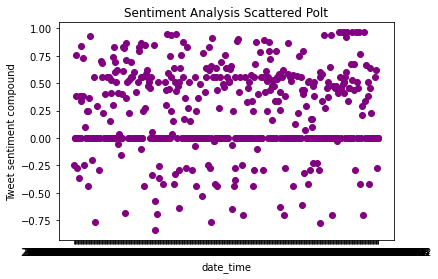

In [ ]:
import matplotlib.pyplot as plt
 # create a scattered plot to show the compound using vader over time
plt.Figure(figsize=(8,6))
for i in range(0, df_Twbtc.shape[0]):
  plt.scatter(df_Twbtc['date_time'][i], df_Twbtc['compound'][i], color= 'purple')
plt.title('Sentiment Analysis Scattered Polt')
plt.xlabel('date_time')
plt.ylabel('Tweet sentiment compound')
plt.show()